# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# print the graphs in the notebook
%matplotlib inline

# set seaborn style to white
sns.set_style('white')

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [96]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'

tips = pd.read_csv(url)
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

In [ ]:
# 答案：
del tips['Unnamed: 0']

tips.head()

In [14]:
# 自己的解法：
# tips = tips.drop(columns=list(tips.filter(like='Unnamed').columns))
# tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

/Users/shihaosun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


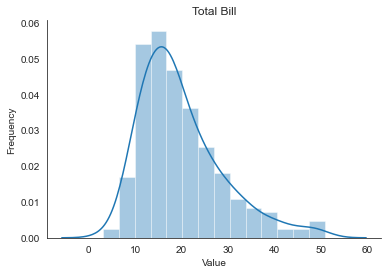

In [99]:
# 答案：
# create histogram
ttbill = sns.distplot(tips.total_bill)

# set lables and titles
ttbill.set(xlabel = 'Value', ylabel = 'Frequency', title = 'Total Bill')

# take out the right and upper borders
sns.despine()

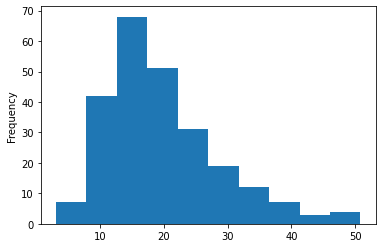

In [17]:
# 自己的解法：
tips.total_bill.plot(kind='hist')
plt.show()

Text(0.5, 1.0, 'Frequency of Total Bill')

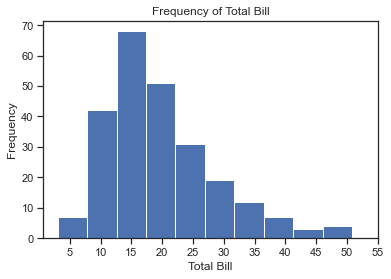

In [118]:
# 自己试：
tips['total_bill'].plot(kind='hist', stacked=True, xticks=range(5, 56, 5))
plt.xlabel('Total Bill')
plt.title('Frequency of Total Bill')

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

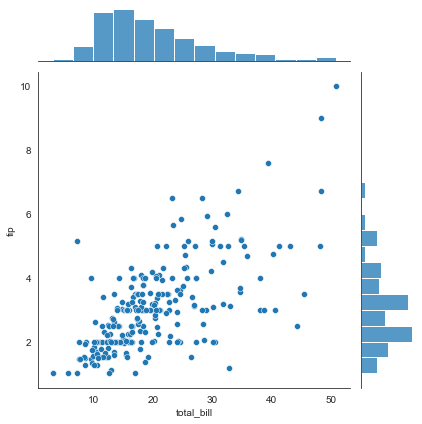

In [100]:
# 答案：
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)

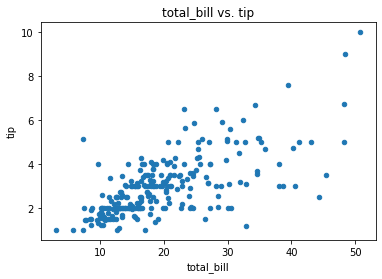

In [19]:
# 自己的解法：
tips.plot(kind='scatter', x='total_bill', y='tip', title='total_bill vs. tip')
plt.show()

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

In [21]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

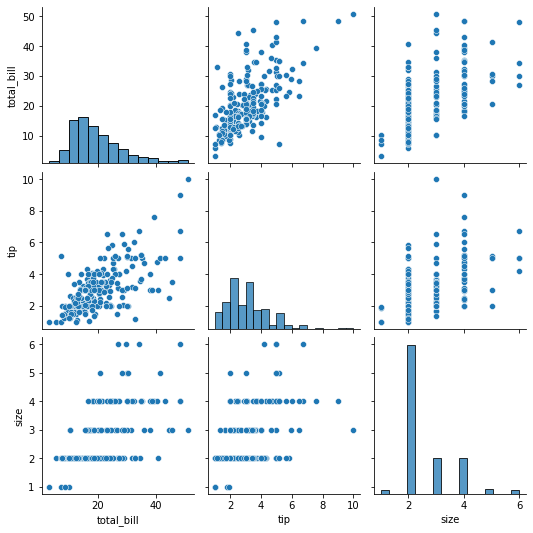

In [22]:
sns.pairplot(tips)

### Step 8. Present the relationship between days and total_bill value

<AxesSubplot:xlabel='day', ylabel='total_bill'>

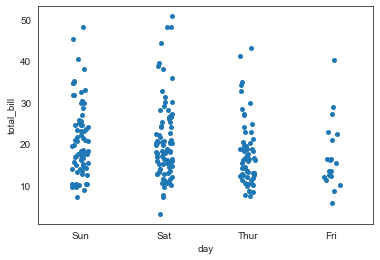

In [101]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

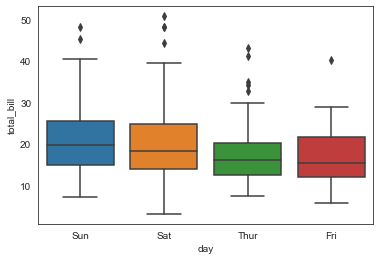

In [107]:
# 自己加：
sns.boxplot(x = 'day', y = 'total_bill', data = tips)

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

<AxesSubplot:xlabel='tip', ylabel='day'>

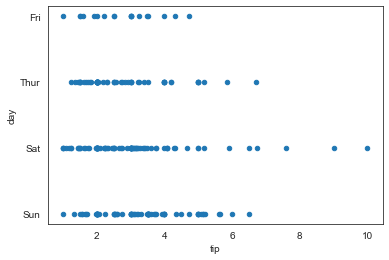

In [106]:
# 自己的解法：
tips.plot(kind='scatter', x = 'tip', y = 'day')

<AxesSubplot:xlabel='tip', ylabel='day'>

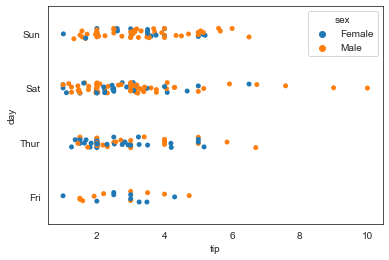

In [102]:
# 答案：
sns.stripplot(x = 'tip', y = 'day', hue = 'sex', data = tips, jitter = True)

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

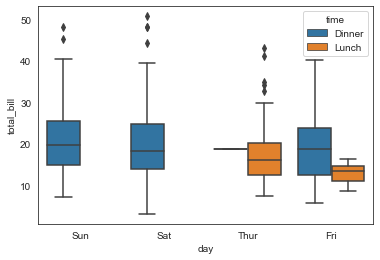

In [103]:
sns.boxplot(x = 'day', y = 'total_bill', hue = 'time', data = tips)

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

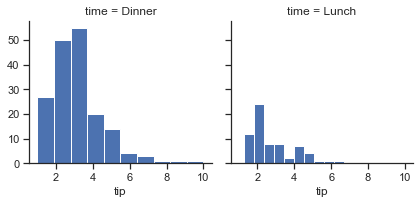

In [115]:
# 答案：
# better seaborn style
sns.set(style = 'ticks')

# creates FacetGrid
g = sns.FacetGrid(tips, col = 'time')
g.map(plt.hist, 'tip');

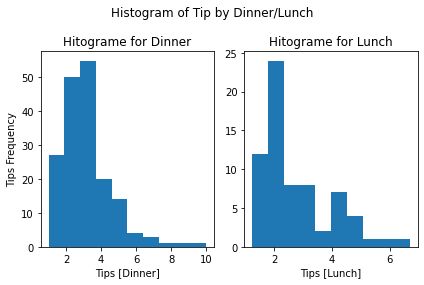

In [75]:
# 自己的解法：
fig, ax = plt.subplots(1,2, layout='tight')
tips.loc[tips['time'] == 'Dinner', 'tip'].plot(kind='hist', ax=ax[0])
tips.loc[tips['time'] == 'Lunch', 'tip'].plot(kind='hist', ax=ax[1])

ax[0].set_title('Hitograme for Dinner')
ax[0].set_xlabel('Tips [Dinner]')
ax[0].set_ylabel('Tips Frequency')

ax[1].set_title('Hitograme for Lunch')
ax[1].set_xlabel('Tips [Lunch]')
ax[1].set_ylabel('')

fig.suptitle('Histogram of Tip by Dinner/Lunch')
plt.show()

<AxesSubplot:xlabel='time', ylabel='tip'>

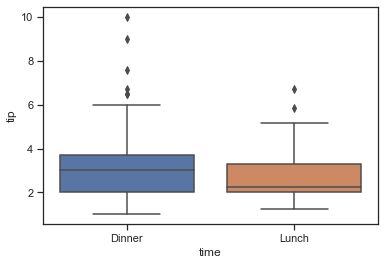

In [120]:
# 自己加：
sns.boxplot(x='time', y='tip', data=tips)

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

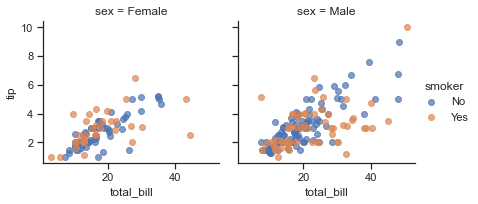

In [114]:
# 答案：
g = sns.FacetGrid(tips, col = 'sex', hue = 'smoker')
g.map(plt.scatter, 'total_bill', 'tip', alpha = .7)

g.add_legend();

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

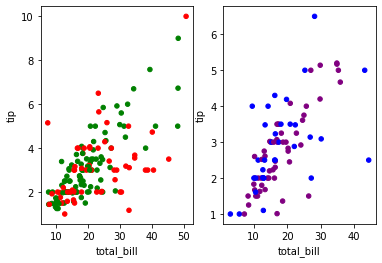

In [94]:
# 自己的解法：
male = tips.loc[tips['sex'] == 'Male']
female = tips.loc[tips['sex'] == 'Female']

fig, (ax1, ax2) = plt.subplots(1, 2)
male.plot.scatter(x='total_bill', y='tip', c=male['smoker'].replace({'Yes':'red', 'No':'green'}), ax=ax1)
female.plot.scatter(x='total_bill', y='tip', c=female['smoker'].replace({'Yes':'blue', 'No':'purple'}), ax=ax2)

### BONUS: Create your own question and answer it using a graph.